In [2]:
import ROOT
import array

Welcome to JupyROOT 6.30/04


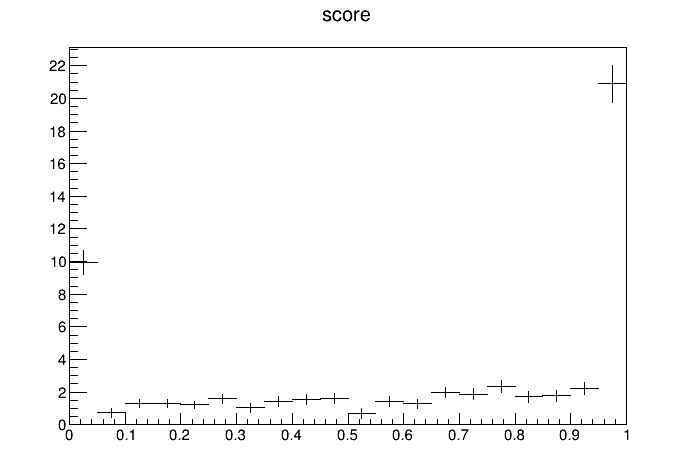

In [5]:
f = ROOT.TFile.Open("PromptSkimmer_WZTo3LNu_amcatnlo.root")
tree = f.Get("Events_Central")
h = ROOT.TH1D("score", "score", 100, 0, 1)
SIG = "MHc-130_MA-90"
BKG = "ttZ"

mass = array.array("d", [0]); tree.SetBranchAddress("mass1", mass)
score = array.array("d", [0]); tree.SetBranchAddress(f"score_{SIG}_vs_{BKG}", score)
weight = array.array("d", [0]); tree.SetBranchAddress("weight", weight)

for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if not (60 < mass[0] < 120): continue
    h.Fill(score[0], weight[0])

h.SetStats(0)
h.SetLineColor(ROOT.kBlack)
h.Rebin(5)
c = ROOT.TCanvas()
h.Draw()
c.Draw()